BUSINESS OBJECTIVE OF THE ANALYSIS

TO investigate the Indian Start-ups ecosystem and propose the best course of action by analyzing funding received from 2018 to 2021.

In [272]:
# Import all the necessary packages

import pandas as pd
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from dotenv import dotenv_values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')





DATA COLLECTION

In [273]:
# Create dotenv variable and connection variable using pyodbc

environment_variable = dotenv_values('.env')

server_name = environment_variable.get('server')
username = environment_variable.get('login')
password = environment_variable.get('password')
database_name = environment_variable.get('database')


connection_string = f'DRIVER={{SQL Server}};SERVER={server_name};PWD={password};DATABASE={database_name};UID={username}'

connection = pyodbc.connect(connection_string)

In [274]:
# Load data set(2020) from the SQL database 

query = 'SELECT * FROM dbo.LP1_startup_funding2020'

data_2020 = pd.read_sql_query(query,connection)
data_2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [275]:
data_2020.shape

(1055, 10)

In [276]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [277]:
# Load the second data set(2021) from the SQL database connected

query1 = 'SELECT * FROM dbo.LP1_startup_funding2021'
data_2021 = pd.read_sql_query(query1,connection)
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [278]:
data_2021.shape

(1209, 9)

In [279]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [280]:
# Load the third data set(2018) directly from a csv file
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [281]:
data_2018.shape

(526, 6)

In [282]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [283]:
# Load the fouth data set(2019) from csv file

data_2019 = pd.read_csv('startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [284]:
data_2019.shape

(89, 9)

In [285]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


ANALYSIS QUESTIONS
1. How many company brands received funding between 2018 and 2021?
2. What is the total amount raised by startups from 2018 to 2021?
3. How many startups are located in various headquarters?
4. Which sector group received the highest funding?


HYPOTHESIS
Null hypothesis: There is no significant relationship between funding amount and headquarter/location.

Alternate hypothesis: There is a significant relationship between funding amount and headquarter/location.

DATA CLEANING AND PREPROCESSING

Checking for inconsistencies in data_2020

In [286]:
# Checking for the unique values in Company_Brand
data_2020['Company_Brand'].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [287]:
# Check for the number of unique values 
data_2020['Company_Brand'].nunique()

905

In [288]:
# Check for the counts of unique values
data_2020['Company_Brand'].value_counts()

Company_Brand
Nykaa          6
Zomato         6
Rebel Foods    4
Servify        4
Vedantu        4
              ..
Odwen          1
Fasal          1
Trukky         1
Specsmakers    1
Pando          1
Name: count, Length: 905, dtype: int64

In [289]:
# Show the summary statistics
data_2020['Company_Brand'].describe()

count      1055
unique      905
top       Nykaa
freq          6
Name: Company_Brand, dtype: object

In [290]:
# Check for the null values in Company_Brand
data_2020['Company_Brand'].isnull().sum()

0

In [291]:
# Check for the inconsistensies in Founded column

# check for the unique values in Founded column
data_2020['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

In [292]:
data_2020['Founded'].value_counts()

Founded
2015.0    136
2018.0    123
2019.0    104
2016.0    103
2017.0     92
2014.0     72
2020.0     42
2012.0     40
2013.0     36
2011.0     31
2008.0     18
2010.0     16
2009.0      7
2006.0      6
2007.0      4
1995.0      2
1982.0      1
1998.0      1
1978.0      1
1999.0      1
1994.0      1
2005.0      1
1973.0      1
2002.0      1
2004.0      1
2001.0      1
Name: count, dtype: int64

In [293]:
# Show the summary statistics for the Founded column
data_2020['Founded'].describe()

count     842.000000
mean     2015.363420
std         4.097909
min      1973.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: Founded, dtype: float64

In [294]:
# Check for the missing values in the Founded column

data_2020['Founded'].isnull().sum()

213

In [295]:
# Fill the null values with the mean value

data_2020['Founded'].fillna(data_2020['Founded'].mean(), inplace=True)


In [296]:
# Check for the null values again

data_2020['Founded'].isna().sum()

0

In [297]:
# Drop Founders column because it's inconsequential to the business objectives of the analysis
data_2020.drop('Founders', axis=1, inplace=True)


Checking the inconsistencies in the Headquater column

In [298]:


data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [299]:

indian_cities = ['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
                 'Gurgaon', 'Noida', 'Mumbai', 'Jaipur', 'Ahmedabad', 'Kolkata',
                 'Thane', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Delhi',
                 'Dhingsara', 'Patna', 'Trivandrum', 'Cochin', 'Samastipur', 'Tumkur',
                 'Kanpur', 'Chandigarh', 'Warangal', 'Hyderebad', 'Odisha', 'Bihar', 'Goa',
                 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal', 'Banglore', 'Coimbatore', 'Bengaluru']
# Check  for the rows with the indian cities in Headquarter column
indian_cities_rows = data_2020['HeadQuarter'].isin(indian_cities)

# Filter out rows without index positions

data_2020 = data_2020.loc[indian_cities_rows]


In [300]:
# Check for the summary statistics
data_2020['HeadQuarter'].describe()

count           898
unique           34
top       Bangalore
freq            317
Name: HeadQuarter, dtype: object

In [301]:
data_2020['HeadQuarter'].isna().sum()

0

In [302]:
# Show the cleaned Headquater data values
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Noida', 'Mumbai', 'Jaipur', 'Ahmedabad', 'Kolkata',
       'Thane', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Delhi', 'Patna', 'Cochin', 'Kanpur', 'Chandigarh', 'Warangal',
       'Hyderebad', 'Odisha', 'Bihar', 'Goa', 'Tamil Nadu',
       'Uttar Pradesh', 'Bhopal', 'Banglore', 'Coimbatore', 'Bengaluru'],
      dtype=object)

From the preview, not all indian cities from the raw dataset have index positions in the Headquater column. Thus, I filtered them out to ensure consistency in the dataset and to improve its quality towards testing the analysis hypotesis which is location-centric and the over all business objectives.

Checking for the inconsistencies and cleaning the Sector column

In [303]:
# Check for the unique values
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Delivery', 'Virtual auditing startup', 'E-commerce',
       'Gaming', 'Work fulfillment', 'AI startup', 'Telecommunication',
       'Food Industry', 'Logistics', 'Tech Startup', 'Sports', 'Retail',
       'Medtech', 'Tyre management', 'Cloud company', 'Software company',
       'Venture capitalist', 'Renewable player', 'IoT startup',
       'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'HR Tech', 'Hospitality',
       'Job portal', 'Digital Media', 'Dairy st

In [304]:
# Check for the value counts
data_2020['Sector'].value_counts()

Sector
Fintech                  68
Edtech                   53
FinTech                  42
EdTech                   36
E-commerce               31
                         ..
Marketing startup         1
Service industry          1
Social media              1
Jewellery                 1
Automobile Technology     1
Name: count, Length: 273, dtype: int64

In [305]:
# Check for the summary statistics
data_2020['Sector'].describe()

count         887
unique        273
top       Fintech
freq           68
Name: Sector, dtype: object

In [306]:
# check for the null values
data_2020['Sector'].isna().sum()

11

In [307]:
data_2020['Sector'].dtype

dtype('O')

In [308]:
# Fill null values using SimpleImputer

most_frequent_value = data_2020['Sector'].mode()[0]


data_2020['Sector'] = data_2020['Sector'].fillna(value=most_frequent_value)



In [309]:
data_2020['Sector'].isna().sum()

0

Checking for the inconsistencies and cleaning column What_it_does

In [310]:
# Show the unique values
data_2020['What_it_does'].unique()

array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste',
       'Escrow-as-a-service platform',
       'Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.',
       'qZense Labs is building the next-generation IoT solution for fresh food quality assessment and management.',
       'MyClassboard is a full-fledged School / College Management Software.',
       'AI driven networking platform for individuals and organisations which aims to provided a seamless end to end networking experience.',
       'Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.',
       'GigIndia is a marketplace that provides on-demand work completion for companies through a gig workforce of jobseekers.',
       'Slurrp Farm is a children health food brand.',
  

In [311]:
# Check for the value counts

data_2020['What_it_does'].value_counts()

What_it_does
Onine learning platform                                                                                                             4
Nykaa is an online marketplace for different beauty and wellness products.                                                          3
Credgenics is a tech-enabled platform backed by Titan Capital, helping fintech lenders and Banks in their critical NPA reduction    3
A finance lender to SMEs                                                                                                            3
Offers techno logistics solutions                                                                                                   3
                                                                                                                                   ..
Gaana is a commercial music streaming service providing free and licensed music.                                                    1
A pioneering organization in the farming-as-a ser

In [312]:
# Check for the data type
data_2020['What_it_does'].dtype

dtype('O')

In [313]:
# Find the null values
data_2020['What_it_does'].isna().sum()

0

Checking for the inconsistencies and cleaning column Amount

In [314]:
# Display the unique values
data_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 5.6000000e+05, 2.7500000e+05, 2.0000000e+07,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 4.0000000e+04, 3.5000000e+07,
       3.0000000e+05, 2.5000000e+07, 3.5000000e+06, 2.0000000e+08,
       6.0000000e+06, 1.3000000e+06, 4.1000000e+06, 8.0000000e+05,
       2.8000000e+07, 1.8000000e+07, 3.2000000e+06, 2.5000000e+05,
       4.7000000e+06, 1.2100000e+08, 3.3000000e+06, 1.1000000e

In [315]:
# Check the data type
data_2020['Amount'].dtype

dtype('float64')

In [316]:
# Check for the NAN values
data_2020['Amount'].isna().sum()

230

In [317]:
# Show the summary statistics
data_2020['Amount'].describe()

count    6.680000e+02
mean     1.265499e+08
std      2.709604e+09
min      1.270000e+04
25%      9.796475e+05
50%      3.000000e+06
75%      1.000000e+07
max      7.000000e+10
Name: Amount, dtype: float64

In [318]:
# Fill the null values with 0
# data_2020['Amount'] = pd.to_numeric(data_2020['Amount'], errors='coerce')


# data_2020.fillna(0, inplace=True)
data_2020.dropna(subset='Amount', inplace=True)


In [319]:
data_2020['Amount'].isna().sum()

0

Checking for the inconsistencies and cleaning column Stage

In [320]:
# Display the unique values
data_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Series C', 'Series A',
       'Series B', 'Debt', 'Pre-series C', 'Series E', 'Series D',
       'Bridge', 'Series B2', 'Pre-series B', 'Edge', 'Series H',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed round',
       'Seed Round & Series A', 'Pre Series A', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Pre series B',
       'Pre series C', 'Angel Round', 'Series D1', 'Mid series',
       'Pre seed round', 'Series F', 'Seed funding', 'Seed Funding'],
      dtype=object)

In [321]:
# Show the value counts
data_2020['Stage'].value_counts()

Stage
Series A                 72
Seed                     52
Series B                 46
Series C                 41
Seed Round               36
Pre-series A             34
Pre series A             31
Series D                 22
Debt                     14
Pre Series A              9
Seed round                6
Pre-seed                  6
Series E                  6
Series F                  3
Bridge                    3
Pre-series B              3
Pre series B              2
Seed funding              2
Series B2                 2
Pre-series C              2
Pre seed round            1
Mid series                1
Series D1                 1
Angel Round               1
Pre series C              1
Series A-1                1
Series E2                 1
Pre series A1             1
Seed Round & Series A     1
Seed A                    1
Pre-Series B              1
Series H                  1
Edge                      1
Seed Funding              1
Name: count, dtype: int64

In [322]:
# Check for the null values
data_2020['Stage'].isna().sum()

262

In [323]:
# Check for  the data type
data_2020['Stage'].dtype

dtype('O')

In [324]:
# fill the null value using filna with Undisclosed
data_2020['Stage'].fillna(value='Undisclosed', inplace=True)

In [325]:
# Check if the null values were filled
data_2020['Stage'].isna().sum()

0

Sart-ups funding in Indian is grouped into 7 stages;
1. Pre-seed
2. Seed
3. Series A
4. Series B
5. Series C
6. Series D
7. Series E
However, Series B,C,D and E can be grouped together because these stages share almost the same characteristics, Start-ups at this stages are considered stable and have started generating revenue to further grow their businesses.
In this project I will group the four stages together.

In [326]:
data_2020['Stage'].unique()

array(['Undisclosed', 'Pre-seed', 'Seed', 'Pre-series A', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Series E',
       'Series D', 'Bridge', 'Series B2', 'Pre-series B', 'Edge',
       'Series H', 'Pre-Series B', 'Seed A', 'Series A-1', 'Seed round',
       'Seed Round & Series A', 'Pre Series A', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Pre series B',
       'Pre series C', 'Angel Round', 'Series D1', 'Mid series',
       'Pre seed round', 'Series F', 'Seed funding', 'Seed Funding'],
      dtype=object)

Create a Stage_category column from the Stage column

In [327]:
# Remove numeric characters from the 'categorical_column'
data_2020['Stage'] = data_2020['Stage'].str.replace('\d', '')

In [328]:
# Check for the nan values
data_2020['Stage'].isna().sum()

0

In [329]:
# Fill the nan values using simple imputer
imputer = SimpleImputer(strategy='most_frequent')

# Reshape the array
stage_array = data_2020['Stage'].values.reshape(-1, 1)

# Create a new DataFrame with the imputed values
imputed_stage = pd.DataFrame(imputer.fit_transform(stage_array), columns=['Stage'])

# Update the original DataFrame
data_2020['Stage'] = imputed_stage['Stage']



In [330]:
data_2020['Stage'].unique()

array(['Undisclosed', 'Pre-seed', 'Seed', 'Pre-series A', 'Series C',
       'Series A', 'Series B', 'Pre-series C', 'Series E', 'Debt',
       'Bridge', 'Pre-series B', 'Series D', 'Series H', 'Pre-Series B',
       'Series A-1', 'Seed round', 'Pre Series A', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Pre series B',
       'Angel Round', 'Series D1', 'Mid series', 'Pre seed round',
       'Series F', 'Seed funding', nan], dtype=object)

In [331]:
# Using map function to create the stage_category column
stage_mapping = {
     'Pre-seed':['Pre-seed','Pre-series A', 'Pre-series','Pre-series C',
               'Pre-series B','Pre-Series B', 'Pre-Seed','Pre-seed Round','Pre Series A', 'Pre seed Round',
               'Pre series A1','Pre series A','Pre seed round', 'Pre series B','Pre series C',],
     'Seed':['Seed','Seed A','Seed Funding','Seed round','Seed Round & Series A',
               'Seed Round','Seed Investment','Seed funding'],
     'Series A':['Series A', 'Series A-1',],
    'Series B,C,D&E':['Series C','Series B','Series E','Series D','Series E2','Series D1',
                                 'Series C, D',],
    'Others':['Mid series','Bridge Round','Angel Round','Edge', 'Series H', 'Bridge','Undisclosed',]
}

data_2020['Stage_category'] = data_2020['Stage'].map(lambda x: next((k for k, v in stage_mapping.items() if x in v), None))

# Display the updated DataFrame
print(data_2020[['Stage','Stage_category']])

             Stage Stage_category
0      Undisclosed         Others
1         Pre-seed       Pre-seed
3      Undisclosed         Others
4             Seed           Seed
5     Pre-series A       Pre-seed
...            ...            ...
1049           NaN           None
1050           NaN           None
1052           NaN           None
1053           NaN           None
1054           NaN           None

[668 rows x 2 columns]


Create a founding year column for data_2020

In [332]:
data_2020['Funding_year'] = '2020'

The Investor and Column 10 variables are going to be dropped because they are considered not significant to the analysis questions, hypothesis testing, and the overall business objectives of this project.

In [333]:
# Drop the Investor and column10 columns
data_2020.drop(['Investor','column10'], axis=1, inplace=True)

In [334]:
# Check for the duplicates
data_2020.duplicated().sum()

2

In [335]:
# Drop the duplicates
data_2020 = data_2020.drop_duplicates()

In [336]:
# Drop Founded column
data_2020.drop(columns=['Founded'],inplace=True)

In [337]:
# Display the cleaned and updated data_2020 dataset
data_2020.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Stage_category,Funding_year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Undisclosed,Others,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Undisclosed,Others,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Seed,Seed,2020
5,qZense,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,600000.0,Pre-series A,Pre-seed,2020


CLEANING DATA_2021 AND CHECKING FOR THE INCONSISTENCIES

In [338]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


Cleaning Companany_Brand column and checking for the inconsistencies

In [339]:
# Check for the unique values
data_2021['Company_Brand'].unique()


array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Gigforce',
       'Vahdam', 'WeRize'], dtype=object)

In [340]:
# Check for the value counts
data_2021['Company_Brand'].value_counts()

Company_Brand
BharatPe            8
BYJU'S              4
CoinSwitch Kuber    3
Delhivery           3
Slice               3
                   ..
MYFITNESS           1
I am Love           1
Gumlet              1
Eloelo              1
WeRize              1
Name: count, Length: 1033, dtype: int64

In [341]:
# Check for the data type
data_2021['Company_Brand'].dtype

dtype('O')

In [342]:
# Check for the summary statistics
data_2021['Company_Brand'].describe()

count         1209
unique        1033
top       BharatPe
freq             8
Name: Company_Brand, dtype: object

In [343]:
# Check for the null values
data_2021['Company_Brand'].isna().sum()

0

Chceck for the inconsistencies and clean HeadQuater column

In [344]:
# Check for the unique values
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [345]:
cities_in_india = indian_cities = ['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
                                    'Jaipur', 'Ahmadabad', 'Chennai', 'Goa', 'Rajsamand', 'Ranchi',
                                    'Faridabad', 'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh',
                                 'Gurgaon', 'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali',
                                'Haryana', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 
                                'Patna', 'Lucknow', 'Telangana', 'Silvassa',
                                'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
                                'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 
                                 'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam',
                                 'Panaji', 'Satara', 'Jodhpur', 'Trivandrum', 'Kanpur',
                                 'Bhilwara', 'Guwahati', 'Kochi', 'The Nilgiris', 
                                'Gandhinagar']
# Test if the Indian Cities are present in the Headquater column by checking for the indices
target_value = 'Patna'
index_position = data_2021[data_2021['HeadQuarter'] == target_value].index.item()

print(index_position)

# Check if all the indian cities are in the Headquarter column 
cities_india_rows = data_2021['HeadQuarter'].isin(cities_in_india)

# Filter out only non indian cities in the dataframe
data_2021 = data_2021.loc[cities_india_rows]


412


In [346]:
# Check for the unique values of the cleaned Headquater column 
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Goa', 'Rajsamand', 'Ranchi',
       'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
       'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore',
       'Powai', 'Ghaziabad', 'Nagpur', 'Patna', 'Lucknow', 'Telangana',
       'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
       'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri',
       'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam', 'Panaji',
       'Satara', 'Jodhpur', 'Trivandrum', 'Kanpur', 'Bhilwara',
       'Guwahati', 'Kochi', 'The Nilgiris', 'Gandhinagar'], dtype=object)

In [347]:
# Check for the value counts 
data_2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore             426
Mumbai                203
Gurugram              155
New Delhi             144
Pune                   47
Chennai                40
Noida                  34
Hyderabad              34
Jaipur                 11
Ahmedabad              11
Gurgaon                 7
Thane                   7
Ahmadabad               6
Chandigarh              5
Kolkata                 5
Haryana                 4
Coimbatore              3
Lucknow                 3
Surat                   2
Ghaziabad               2
Indore                  2
Cochin                  2
Goa                     2
Bhilwara                1
Kanpur                  1
The Nilgiris            1
Trivandrum              1
Kochi                   1
Andheri                 1
Jodhpur                 1
Satara                  1
Panaji                  1
Kottayam                1
Bhubaneswar             1
Telugana                1
Mangalore               1
Guwahati                1
Patna                   1


In [348]:
# Check for the null values in the Headquarter column
data_2021['HeadQuarter'].isna().sum()

0

In [349]:
# Check for the data type 
data_2021['HeadQuarter'].dtype

dtype('O')

In [350]:
# Show the summary statistics
data_2021['HeadQuarter'].describe()

count          1184
unique           52
top       Bangalore
freq            426
Name: HeadQuarter, dtype: object

 Cleaning and checking for the inconsistencies in Sector column

In [351]:
# Check for the unique values
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'IT', 'Logistics',
       'Hospitality', 'Fashion', 'Marketing', 'Transportation',
       'LegalTech', 'Food delivery', 'Automotive', 'SaaS startup',
       'Fantasy sports', 'Video communication', 'Social Media',
       'Skill development', 'Retail', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'Industrial Auto

In [352]:
# Check for the value counts
data_2021['Sector'].value_counts()

Sector
FinTech                   120
EdTech                    100
Financial Services         60
Food & Beverages           37
E-commerce                 37
                         ... 
Beverages                   1
Manufacturing startup       1
Cryptocurrency              1
Vehicle repair startup      1
Staffing & Recruiting       1
Name: count, Length: 247, dtype: int64

In [353]:
# Show the summary statistics
data_2021['Sector'].describe()

count        1184
unique        247
top       FinTech
freq          120
Name: Sector, dtype: object

In [354]:
# Check for the null values
data_2021['Sector'].isna().sum()

0

Checking for the inconsistencies and cleaning  'What_it_does' column

In [355]:
# Check for the unique values
data_2021['What_it_does'].unique()

array(['Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.',
       'UpGrad is an online higher education platform.',
       'LEAD School offers technology based school transformation system that assures excellent learning for every child.',
       ..., 'International education loans for high potential students.',
       'Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.',
       'India’s first socially distributed full stack financial services platform for small town India'],
      dtype=object)

In [356]:
# Check for the value counts
data_2021['What_it_does'].value_counts()

What_it_does
BharatPe develops a QR code-based payment app for offline retailers and businesses.                                                                    4
BYJU'S is an educational technology company that develops personalized learning programs for K-12 students.                                            4
Ruptok fintech Pvt. Ltd. is an online gold loan service provider , with attractive interests rate .                                                    3
KreditBee is a digital lending platform developed to assist young professionals with their personal finances.                                          2
Advantage Club is India's largest employee engagement platform, Provide end to end employee benefit management with state of the art products like:    2
                                                                                                                                                      ..
Pocket Aces is a digital entertainment company focused on mobile vide

In [357]:
# Check for the summary statistics
data_2021['What_it_does'].describe()


count                                                  1184
unique                                                 1121
top       BharatPe develops a QR code-based payment app ...
freq                                                      4
Name: What_it_does, dtype: object

In [358]:
# Check for the null values
data_2021['What_it_does'].isna().sum()

0

Cleaning and checking for the inconsistencies in 'Amount' column

In [359]:
# Check for the unique values
data_2021['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$1,100,000',
       '$6,000,000', '$500,000', '$10,000,000', '$21,000,000',
       '$26,000,000', '$7,400,000', '$1,500,000', '$600,000',
       '$800,000,000', '$17,000,000', '$3,500,000', '$215,000,000',
       '$2,500,000', '$350,000,000', '$5,500,000', '$83,000,000',
       '$110,000,000', '$500,000,000', '$65,000,000', '$150,000,000,000',
       '$300,000,000', '$2,200,000', '$35,000,000', '$140,000,000',
       '$4,000,000', '$13,000,000', None, '$Undisclosed', '$2000000',
       '$800000', '$6000000', '$2500000', '$9500000', '$13000000',
       '$5000000', '$8000000', '$1000000', '$200000', '$12000000',
    

In [360]:

data_2021['Amount'].replace(['$Undisclosed','$undisclosed','Undisclosed'],np.nan,inplace=True)

In [361]:
# Check for the null values
data_2021['Amount'].isna().sum()

138

In [362]:


# Drop the nan values
data_2021.dropna(subset='Amount',inplace=True)





In [363]:
# Replace $ sign with nan values
data = data_2021.index[data_2021['Amount'] == '$']
data_2021.loc[data,['Amount']] = pd.NA

In [364]:
data_2021.loc[data]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1137,EventBeep,2019.0,Pune,EdTech,An inclusive community where students are insp...,"Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasad","SucSEED Indovation Fund, Uincept, Palimala Ve...",<NA>,None
1146,MPL,2018.0,Bangalore,sports,"Mobile Premier League (MPL), is India’s larges...","Sai Srinivas Kiran GV, Shubh Malhotra",Legatum Capital,<NA>,Series E


In [365]:
amount_list=['Seed','LetsVenture','JITO Angel Network','LetsVenture','ITO Angel Network','Pre-series A','ah! Ventures']
amount_index = data_2021.index[data_2021['Amount'].isin(amount_list)]
stage_value = data_2021.loc[amount_index,['Amount']].values
data_2021.loc[amount_index,['Amount']] = data_2021.loc[amount_index,['Stage']].values
data_2021.loc[amount_index,['Stage']] = stage_value
data_2021.loc[amount_index]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,ah! Ventures
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,None,Pre-series A
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,None,Seed


In [366]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


Cleaning the Stage column


In [367]:
# Check for the unique values
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah! Ventures', '$300000', 'Series D1',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Since we 7 Start-up funding stages, the stage column will be grouped accordingly. 

In [368]:
# Clean the non categorical values from the Stage column

data_2021['Stage'] = data_2021['Stage'].replace(to_replace=r'\d', value='', regex=True)

In [369]:
# Check for the unique values after cleaning it
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F', 'Series A+', 'Series G', 'Series H',
       'PE', 'ah! Ventures', '$', 'Seies A', 'Pre-series', 'Series I'],
      dtype=object)

In [370]:
# Strip $ sing and None from the Stage column
value_to_remove = ['$',]
data_2021['Stage'] = data_2021['Stage'][~data_2021['Stage'].isin(value_to_remove)]


In [371]:
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Bridge', 'Seed+', 'Series F', 'Series A+', 'Series G', 'Series H',
       'PE', 'ah! Ventures', nan, 'Seies A', 'Pre-series', 'Series I'],
      dtype=object)

In [372]:
# Group the stage column into stage category using map function
category_mapping ={ 'Pre-seed':['Pre-seed','Pre-series B','Pre-series','Pre-series A'],
                 'Seed':['Seed','Seed+','Early seed',],
                 'Series A':['Series A','Series A+',],
                 'Series B,C,D&E':['Series B','Series C','Series D','Series E',],
                 'Others':['Series G', 'Series H','Debt','Bridge','Series F','PE','Series I']
}

def mapping_category(stage):
    for category, stages in category_mapping.items():
        if stage in stages:
            return category
    return 'unknown'
# Create stage_category column
data_2021['Stage_category'] = data_2021['Stage'].apply(mapping_category)

In [373]:
# Fill NaN values with the most frequent category
most_frequent_category = data_2021['Stage'].mode()[0]
data_2021['Stage'] = data_2021['Stage'].fillna(most_frequent_category)


In [374]:
# Check for the nan values again 
data_2021['Stage'].isna().sum()

0

In [375]:
data_2021['Funding_year'] = '2021'

I will drop Founded, Founders and Investor columns because they are not significant to the business objectives of this analysis.

In [376]:
data_2021.drop(['Founded','Founders','Investor'], axis=1, inplace=True)

In [377]:
data_2021.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Stage_category,Funding_year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,Pre-seed,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",Seed,unknown,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,"Series B,C,D&E",2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,"Series B,C,D&E",2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,Seed,2021


In [378]:
# Check for duplicates in data_2021
data_2021.duplicated().sum()

16

In [379]:
# Drop the duplicated rows and print the cleaned data_2021 data set
data_2021.drop_duplicates()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Stage_category,Funding_year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",Pre-series A,Pre-seed,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",Seed,unknown,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",Series D,"Series B,C,D&E",2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",Series C,"Series B,C,D&E",2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",Seed,Seed,2021
...,...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,$3000000,Pre-series A,Pre-seed,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,$20000000,Series D,"Series B,C,D&E",2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,$55000000,Series C,"Series B,C,D&E",2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",$26000000,Series B,"Series B,C,D&E",2021


Checking for the inconsistencies and cleaning data_2018 and data_2019

In [380]:
data_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [381]:
# Rename the columns
data_2018.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does',
    'Round/Series':'Stage'
}, inplace=True)


In [382]:
# Create funding_year column for 2018 data set
data_2018['Funding_year'] = '2018'

In [383]:
data_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [384]:
# Display data_2019
data_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [385]:
# Drop Founded, Founders, and Investor columns
data_2019.drop(['Founded','Founders','Investor'], axis=1, inplace=True)

In [386]:
# Create Funding_ year column for 2019 data set
data_2019['Funding_year'] = '2019'

In [387]:
data_2019.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Funding_year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019


In [388]:
# Rename the Company/Brand colummn
data_2019.rename(columns={'Company/Brand':'Company_Brand',
                          'What it does':'What_it_does',
                          'Amount($)':'Amount'
                          
                          }, inplace=True)

In [389]:
# Display data_2019 and after renaming the column
data_2019.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Funding_year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019


Merge data_2018 and data_2019 and clean them together

In [390]:
data_1819 = pd.concat([data_2018,data_2019], ignore_index=True)
data_1819.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


Clean Company_Brand column and check for the inconsistencies

In [391]:
# Check for the unique values
data_1819['Company_Brand'].unique()

array(['TheCollegeFever', 'Happy Cow Dairy', 'MyLoanCare', 'PayMe India',
       'Eunimart', 'Hasura', 'Tripshelf', 'Hyperdata.IO', 'Freightwalla',
       'Microchip Payments', 'BizCrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'AppWharf', 'Antariksh Waste Ventures Pvt ltd',
       'Cogoport', 'PaisaDukan', 'Sleepy Owl Coffee', 'BlueJack',
       'PregBuddy', 'AgNext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'NicheAI', 'Chariot Tech',
       'Ideal Insurance Brokers/ 121Policy.com', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'IndigoLearn', 'UClean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet for Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'ONGO Framework', 'Notesgen',
       'Arogya MedTech', 'Propshop24', 'myUpchar',
     

In [392]:
# Check for the value counts
data_1819['Company_Brand'].value_counts()

Company_Brand
Licious                           3
TheCollegeFever                   2
Awign Enterprises                 2
Kaleidofin                        2
Ola                               2
                                 ..
Creator’s Gurukul                 1
Emflux Motors                     1
Tricog Health Services Pvt Ltd    1
Scapic                            1
Ess Kay Fincorp                   1
Name: count, Length: 598, dtype: int64

In [393]:
# Check for the null values
data_1819['Company_Brand'].isna().sum()

0

In [394]:
# Check for the duplicates
data_1819['Company_Brand'].duplicated().sum()

17

In [395]:
# Drop the duplicates
data_1819['Company_Brand'].drop_duplicates(inplace=True)


Clean the Amount column

In [396]:
# Check for the unique values
data_1819['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [397]:
# Use a function to convert the currency 
def convert_to_usd(amount, exchange_rate):
    if isinstance(amount, str) and '₹' in amount:
        # Remove commas and extract the numerical value
        amount_inr = amount[1:].replace(',', '')
        try:
            amount_inr = float(amount_inr)
        except ValueError:
            # Handle cases where the value cannot be converted to float
            return amount

        amount_usd = amount_inr / exchange_rate
        return f'${amount_usd:.2f}'
    elif isinstance(amount, str) and '$' not in amount:
        # If no currency sign is present, assume it's in USD
        amount_usd = amount.replace(',', '')
        try:
            amount_usd = float(amount_usd)
        except ValueError:
            # Handle cases where the value cannot be converted to float
            return amount

        return f'${amount_usd:.2f}'
    else:
        return amount

# the average exchange rate between year 2018 to 2019
exchange_rate_inr_to_usd = 69.88

# Apply the conversion function to the 'Amount' column
data_1819['Amount'] = data_1819['Amount'].apply(lambda x: convert_to_usd(x, exchange_rate_inr_to_usd))


In [398]:
# Check for the value count
data_1819['Amount'].value_counts()

Amount
—               148
$1000000.00      24
$500000.00       13
$2000000.00      12
Undisclosed      12
               ... 
$130000.00        1
$499427.59        1
$17200000.00      1
$457927.88        1
$33,000,000       1
Name: count, Length: 235, dtype: int64

In [399]:
# Replace _ with nan in the Amount column
data_1819['Amount'].replace('-',np.nan,inplace=True, regex=True)

In [400]:
# Replace undisclosed with nan value
data_1819['Amount'].replace('$Undisclosed',np.nan,inplace=True)



In [401]:
# Remove - from the column
data_1819 = data_1819[data_1819['Amount'] != '_']

In [402]:
# Check for the null values
data_1819['Amount'].isna().sum()

0

In [403]:
data_1819.shape

(615, 7)

In [404]:

data_1819['Amount'].fillna(0, inplace=True)

In [405]:
# Check for duplicates
data_1819['Amount'].duplicated().sum()

380

In [406]:
# Drop the duplicates
data_1819['Amount'].drop_duplicates(inplace=True)

Clean the HeadQuarter Column and check for the inconsistencies

In [407]:
# Check for the unique values
data_1819['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [408]:
# Check for the value counts
data_1819['HeadQuarter'].value_counts()

HeadQuarter
Bangalore, Karnataka, India    102
Mumbai, Maharashtra, India      94
Bengaluru, Karnataka, India     55
Gurgaon, Haryana, India         52
New Delhi, Delhi, India         51
                              ... 
Uttar Pradesh, India, Asia       1
Andheri, Maharashtra, India      1
Mylapore, Tamil Nadu, India      1
Powai, Assam, India              1
Rajasthan                        1
Name: count, Length: 67, dtype: int64

In [409]:
# Remove india from the Headquarter column
data_1819['HeadQuarter'] = data_1819['HeadQuarter'].replace('India',np.nan)

In [410]:
# Check for the null values
data_1819['HeadQuarter'].isna().sum()

19

In [411]:
# Fill the nan values with the mode
mode_value = data_1819['HeadQuarter'].mode()[0]
data_1819['HeadQuarter'].fillna(value=mode_value,inplace=True)

In [412]:
# Check for the duplicates
data_1819['HeadQuarter'].duplicated().sum()

548

In [413]:
# Drop the duplicates
data_1819['HeadQuarter'].drop_duplicates(inplace=True)

Clean the Stage column and check for the inconsistencies

In [414]:
# Check for the unique values
data_1819['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A'],
      dtype=object)

In [415]:
# Group the Stages into 5 groups(Pre-seed, Seed, Series A, Series B,C,D&E and Others) and name the column Stage_category
stage_mappings = {'Pre-Seed':['Pre-Seed', 'Pre series A','Pre-series A'],
                  'Seed':['Seed','Seed fund','Seed funding','Seed round'],
                  'Series A':['Series A'],
                  'Series B,C,D&E':['Series B', 'Series C','Series E','Series D'],
                  'Others':['Angel','Private Equity','Venture - Series Unknown', 'Grant',
                            'Debt Financing', 'Post-IPO Debt', 'Series H','Corporate Round',
                             'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round',
                             'Fresh funding',]
                 
                  

}
data_1819['Stage_category'] = data_1819['Stage'].map(lambda x:next((k for k, v in stage_mappings.items() if x in v), None))


# Display the updated DataFrame
print(data_1819[['Stage','Stage_category']])



        Stage  Stage_category
0        Seed            Seed
1        Seed            Seed
2    Series A        Series A
3       Angel          Others
4        Seed            Seed
..        ...             ...
610  Series A        Series A
611       NaN            None
612  Series B  Series B,C,D&E
613       NaN            None
614       NaN            None

[615 rows x 2 columns]


In [416]:
# Check for the null values
data_1819['Stage'].value_counts()

Stage
Seed                                                                                                       280
Series A                                                                                                    83
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    28
Series C                                                                                                    19
Debt Financing                                                                                              13
Private Equity                                                                                              10
Pre series A                                                                                              

In [417]:
# Check for the null values
data_1819['Stage'].isna().sum()

46

In [418]:
# # Fill the nan values with the mode value using SimpleImputer

most_frequent_value = 'most_frequent'

# Fill the nan values with the mode value using SimpleImputer
imputer = SimpleImputer(strategy=most_frequent_value)
data_1819['Stage'] = imputer.fit_transform(data_1819[['Stage']])[:,0]


In [419]:
# Check for the duplicates
data_1819['Stage'].duplicated().sum()

584

In [420]:
# Drop the duplicated rows
data_1819['Stage'].drop_duplicates(inplace=True)

Clean and check for the inconsistencies in the Sector column


In [421]:
# Check for the unique values
data_1819['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [422]:
# Check for the value count
data_1819['Sector'].value_counts()

Sector
—                                                                          30
Financial Services                                                         15
Education                                                                   8
Information Technology                                                      7
Edtech                                                                      7
                                                                           ..
Digital Media, EBooks, Publishing, Reading Apps                             1
Hospitality, Real Estate                                                    1
Internet, Mobile, Social Entrepreneurship, Telecommunications, Wireless     1
Veterinary                                                                  1
Automobile & Technology                                                     1
Name: count, Length: 450, dtype: int64

In [423]:
# Check for the nan values
data_1819['Sector'].isna().sum()

5

In [424]:
# Drop the nan values
data_1819['Sector'].dropna(inplace=True)

In [425]:
# Check for the duplicates
data_1819['Stage'].duplicated().sum()

584

In [426]:
# Drop the duplicated rows
data_1819['Sector'].drop_duplicates(inplace=True)


Clean 'what_it_does' column and check for the inconsistencies

In [427]:
# Check for the unique values
data_1819['What_it_does'].unique()

array(['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India',
       'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
       'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
       'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
       'Tripshelf is an online market place for holiday packages.',
       'Hyperdata combines advanced machine learning with human intelligence.',
       'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
       'Microchip payments is a mobile-based payment application and point-of-sale device',
       'Building Transactionary B2B Marketplaces',
       'Emoji

In [428]:
# Check for the null values
data_1819['What_it_does'].isna().sum()

0

In [429]:
# Check for the duplicates
data_1819['What_it_does'].duplicated().sum()

3

In [430]:
# Drop the duplicates
data_1819['What_it_does'].drop_duplicates(inplace=True)

Print the cleaned data_1819 data set

In [431]:
data_1819.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Funding_year,Stage_category
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,$250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Seed
1,Happy Cow Dairy,"Agriculture, Farming",Seed,$572409.85,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Seed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,$930166.00,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Series A
3,PayMe India,"Financial Services, FinTech",Angel,$2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Others
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Seed


MERGE DATA_2020,DATA_2021 AND DATA_1819 DATA SET FOR THE ANALYSIS

In [432]:
df = pd.concat([data_2020,data_2021,data_1819],ignore_index=True)

df.head(10)

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Stage_category,Funding_year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Undisclosed,Others,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,Pre-seed,2020
2,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Undisclosed,Others,2020
3,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Seed,Seed,2020
4,qZense,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,600000.0,Pre-series A,Pre-seed,2020
5,MyClassboard,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,600000.0,Series C,"Series B,C,D&E",2020
6,Rupeek,Bangalore,FinTech,Rupeek is an online lending platform that spec...,45000000.0,Series A,Series A,2020
7,Gig India,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,1000000.0,Undisclosed,Others,2020
8,Slurrp Farm,Gurgaon,Food & Bevarages,Slurrp Farm is a children health food brand.,2000000.0,Undisclosed,Others,2020
9,Brila 91,New Delhi,Food & Bevarages,Bira 91 is a craft beer company.,1200000.0,Undisclosed,Others,2020


In [433]:
# Replace the non digit values in the Amount column with ''
df['Amount'] = df['Amount'].replace('[^\d]','',regex=True)

In [434]:
# Convert the Amount column values to numeric and non numeric to nan 
df['Amount'] = pd.to_numeric(df['Amount'],errors='coerce')

In [435]:
# Check for the nan values 
df['Amount'].isna().sum()

166

In [436]:
# Drop the nan values
df = df.dropna(subset='Amount')

GROUP THE SECTOR COLUMN UNDER THE GLOBAL INDUSTRY CLASSIFICATION STANDARD   
This column is grouped into 11 classes and sectors that have controversial classifications are grouped under unknown.

In [437]:
# Check for the unique values
df['Sector'].unique()

array(['AgriTech', 'EdTech', 'Escrow', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Retail',
       'Medtech', 'Cloud company', 'Software company', 'Renewable player',
       'IoT startup', 'SaaS startup', 'HealthTech', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Video sharing platform', 'Gaming startup', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'Venture capitalist', 'SaaS platform', 'AI platform', 'HR Tech',
       'Gaming', 'Digital Media', 'Dairy startup', 'Content management',
       'Transportation', 'Trading platform', 'AI Company', 'Tech company',
       'Entertainment', 'Food and Beverages', 'Biotechnology company',
       'CleanTech', 'Healthcare', 'PaaS startup', 'Beverages',
       'Automobiles', '

In [438]:
# Split the joined strings in the column and get the first data value
df['Sector'] = df['Sector'].str.split(',').str.get(0)

In [439]:
# Check for the nan values
df['Sector'].isna().sum()

5

In [440]:
# Drop the nan values
df['Sector'].dropna(inplace=True)

In [441]:
# Create a sector category column
def sector_group(dataframe,column_name='column'):
    sector = []
    for row in dataframe[column_name]:
        if isinstance(row, str):
            if re.search(r'Electricity|Solar Monitoring Company|Embedded Systems|Energy|Electricity|'
                         r'Renewable Energy|Oil and Energy|Pollution control equipment', row):
                sector.append('Energy')
            elif re.search(r'Textiles|3D Printing|Tyre management', row):
                sector.append('Material')
            elif re.search(r'Environmental Consulting|Safety tech|Infratech|'
                           r'Aviation & Aerospace|Staffing & Recruiting|Aviation|Professional Training & Coaching|Maritime|'
                             r'Sales and Distribution|Mechanical Or Industrial Engineering|'
                             r'Logistics & Supply Chain|Mechanical & Industrial Engineering|Industrial Automation|Manufacturing startup|'
                             r'Vehicle repair startup|Logistics|Renewable player|Transportation|'
                             r'Recruitment startup|Warehouse|Manufacturing', row):
                            
                sector.append('Industrial')
            elif re.search(r'Dating|Crowdfunding| Catering| E-Marketplace| B2B Supply Chain| E-Commerce & AR|'
                            r'E-Sports|E-Tail|E-Commerce Platforms|E-Commerce|B2B E-Commerce|Merchandise|Marketing & Advertising|Eyewear|'
                            r'D2C Business|Cultural|Beauty products|Clothing|Sports startup|Tourism|Matrimony|'
                            r'Arts & Crafts|Design|'
                            r'Consumer|Wellness|Children|Consumer Applications|Digital Entertainment|'
                            r'Fantasy sports|Video communication|Skill development|Food delivery|Consumer Goods|Apparel & Fashion|'
                            r'SportsTech|Wine & Spirits|Lifestyle|Music|Mobility|OTT|Online Media|Mobile Games|Food Production|'
                            r'Podcast|Battery|Content publishing|Content commerce|Celebrity Engagement|Personal Care|Cannabis startup|'
                            r'Blogging|Consulting|B2B Marketplace|Social audio|Fashion and lifestyle|Delivery service|Fashion & Lifestyle|'
                            r'D2C|Craft Beer|Education|Social Commerce|Social e-commerce|Fashion Tech|Ecommerce|Automobile|'
                            r'Fashion & Wellness|Cloud Kitchen|IoT/Automobile|Eye Wear|Co-living|Food & Beverages|Marketplace|Coworking|'
                            r'Beauty|Yoga & wellness|Life sciences|Mobility/Transport|Travel|Rental|'
                            r'Nutrition|Co-working|Cryptocurrency|Legal|Fitness|EV|Supply chain|Foodtech & Logistics|'
                            r'Housing|Interior & decor|eMobility|Media & Networking|E-market|'
                            r'Housing & Rentals|Estore|Marketing|E tailor|Ad-tech|Neo-banking|Transport & Rentals|B2B marketplace|Preschool Daycare|E-connect|'
                            r'Tech hub|Deisgning|Taxation|B2B E-commerce|Home services|B2B service|'
                            r'Fashion startup|Food Delivery|Virtual auditing startup|E-commerce|Gaming|Work fulfillment|Sports|Retail|Fashion startup|'
                            r'Consumer appliances|Real Estate|Entertainment|Cosmetics|Skincare startup|Food and Beverages|FoodTech|Fitness startup|Luxury car startup|'
                            r'FM|Food|Nutrition sector|Video platform|Social Media|Fashion|Food devlivery|Eyeglasses|Beverage|TravelTech|Agriculture|'
                            r'Personal care startup|Customer service company|Marketing startup|Service industry|Social media|Jewellery|Automotive company|FMCG', row):
                sector.append('Consumer Discretionary')
            elif re.search(r'Food and Beverages|Food & Nutrition|Food & Tech|Food Processing|Milk startup|Wholesale', row): 
                sector.append('Consumer Staple')
            elif re.search(r'Medical|Medical Device| Alternative Medicine| DentalChild Care, Health Insurance|'
                           r'Health Care|Wellness|Hospital|Dietary Supplements|Medical|'
                           r'Biotechnology|CRM|FemTech|Veterinary|Femtech|Hospital & Health Care|'
                           r'Biomaterial startup|Health|Healthtech|Healthcare/Edtech|Mental Health|Med Tech|Biopharma|Pharmaceutical|Health and Fitness|Helathcare|'
                           r'Dairy startup|Healthcare|Biotechnology company|PaaS startup|HealthCare|Luxury car startup', row):
                sector.append('Health Care')
            elif re.search(r'Virtual auditing startup|Virtual Banking|Mutual Funds|'
                           r'Credit|Consumer Lending|Credit Cards|Events|'
                            r'Funding Platform|Wealth Management|Credit|Consumer Lending| Funding Platform|'
                            r'Wealth Management|Equity Management|Investment Management|'
                            r'Banking|Venture Capital|Venture Capital & Private Equity|Capital Markets|'
                            r'Insurance Tech|Investment|Financial Services|'
                            r'Escrow|Venture capitalist|Finance company|Online financial service|Online credit management startup|'
                            r'Finance|Venture capital|FinTech', row):
                sector.append('Financials')
            elif re.search(r'AI startup|Computer|Android|Fraud Detection|Cybersecurity|E-Commerce Platforms|Cloud Infrastructure|'
                           r'Mobile Payments|Apps|Artificial Intelligence|Internet of Things|'
                            r'E-Commerce|E-Learning|Big Data|Cloud Computing|Enterprise Software|Trading Platform|'
                            r'Digital Marketing|Consumer Applications|Mobile|Aerospace|Digital Entertainment|Business Intelligence|'
                            r'Consumer software|Internet|IT company|Software|Innovation management|Networking|Information Services|'
                            r'Investment Banking|Management Consulting|Product studio|'
                            r'Online Games|Online Portals|Robotics & AI Games|, Search Engine|'
                            r'AI company|Sports startup|Analytics|IoT platform|Commerce|Cloud kitchen|Telecommunications|'
                            r'Electronics|IT startup|Aerospace|Robotics|Computer Games|Information Technology|Tech startup|'
                            r'Digital platform|Computer Software|Software StartupComputer & Network Security|MLOps platform|'
                            r'HealthTech|Innovation Management|BioTechnology|Environmental Services|'
                            r'IT|Data Intelligence|Digital tech|AI & Data science|Machine Learning|'
                            r'AgriTech|Networking platform|AI startup|Cloud company|Software company|IoT startup|SaaS startup|Aero company|'
                            r'Marketing company|Tech company|Solar Monitoring Company|Video sharing platform|Gaming startup|Video streaming platform|Blockchain startup|'
                            r'Conversational AI platform|Spacetech|AI Company|Photonics startup|AR/VR startup|Tech platform|Retail Tech|Car Service|Bike marketplace|'
                            r'Agri tech|AR platform|Content marketplace|Interior Design|Soil-Tech|Ayurveda tech|Packaging solution startup|Cleantech|Sanitation solutions|'
                            r'InsureTech|AI Startup|Solar solution|Deeptech startup|AI|AR startup|Automotive Startup|AI Platform|Automation|Solar SaaS|API platform|'
                            r'Deep Tech|AgriTech|EdTech|Automotive company', row):
                sector.append('Information Technology')
            elif re.search(r'Telecommunication|Search Engine|Reading Apps|News|'
                           r'Brand Marketing|Media and Entertainment|Broadcasting|Advertising|Music Streaming|'
                           r'NFT Marketplace|Social networkOnline storytelling|Community platform|Social platform|Social community|'
                           r'Video streaming platform|Social Network|Publication', row):
                sector.append('Communication Services')
            elif re.search(r'Water Purification|Clean Energy|Renewables & Environment|Environmental service|Nanotechnology', row):
                sector.append('Utilities')
            elif re.search(r'Real Estate|Communities|Enterprise Resource Planning (ERP)|File Sharing|'
                           r'Commercial Real Estate|Housing Marketplace|Furniture Rental', row):
                sector.append('Real Estate')
            else:
                sector.append('unknown')
        else:
            sector.append('unknown')
    return sector

df['Sector_category'] = sector_group(dataframe=df,column_name='Sector')

df.head(20)

        
        
        
        






,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Stage_category,Funding_year,Sector_category
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Undisclosed,Others,2020,Information Technology
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,Pre-seed,2020,Information Technology
2,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Undisclosed,Others,2020,Financials
3,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Seed,Seed,2020,Information Technology
4,qZense,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,600000.0,Pre-series A,Pre-seed,2020,Information Technology
5,MyClassboard,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,600000.0,Series C,"Series B,C,D&E",2020,Information Technology
6,Rupeek,Bangalore,FinTech,Rupeek is an online lending platform that spec...,45000000.0,Series A,Series A,2020,Financials
7,Gig India,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,1000000.0,Undisclosed,Others,2020,unknown
8,Slurrp Farm,Gurgaon,Food & Bevarages,Slurrp Farm is a children health food brand.,2000000.0,Undisclosed,Others,2020,Consumer Discretionary
9,Brila 91,New Delhi,Food & Bevarages,Bira 91 is a craft beer company.,1200000.0,Undisclosed,Others,2020,Consumer Discretionary


In [442]:
df.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Stage_category,Funding_year,Sector_category
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,200000.0,Undisclosed,Others,2020,Information Technology
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,100000.0,Pre-seed,Pre-seed,2020,Information Technology
2,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,400000.0,Undisclosed,Others,2020,Financials
3,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,340000.0,Seed,Seed,2020,Information Technology
4,qZense,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,600000.0,Pre-series A,Pre-seed,2020,Information Technology


Convert the concatenated data set to csv file

In [443]:
df.to_csv('concatenated data.csv',index=False)

EXPLORATORY DATA ANALYSIS

HYPOTHESIS
Null hypothesis: There is no significant relationship between funding amount and headquarter/location.

Alternate hypothesis: There is a significant relationship between funding amount and headquarter/location.
 

Test the Hypotesis using Pearson correlation test

In [444]:
# Extract the columns of the variables
amount = df['Amount']
headquarter = df['HeadQuarter']
# Convert the categorical headquarter variables to numeric using labelencoding
encoder = LabelEncoder()
headquarter_encoded = encoder.fit_transform(headquarter)
#perform pearson correlation test
correlation_coefficient,p_value = pearsonr(amount,headquarter_encoded)
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"p_value: {p_value}")

# Interprete the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between funding amount and headquarter/location.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between funding amount and headquarter/location.")


Pearson correlation coefficient: 0.03891413835127183
p_value: 0.07050964078974715
Fail to reject the null hypothesis: There is no significant relationship between funding amount and headquarter/location.


To answer the reserch questions

1. How many Company Brands received funding between 2018 and 2021?

In [445]:
total_firms_established = len(df['Company_Brand'].unique())
total_firms_established

1674

2088 Companies received funding between 2018 and 2021 in Indian Start-up ecosystem.  

2. What is the total amount raised by startups from 2018 to 2021?

In [446]:
total_amount_raised = df.groupby('Company_Brand')['Amount'].sum()
total_amount_raised 

Company_Brand
1Bridge               2500000.0
1Crowd              350000000.0
1K Kirana Bazaar      7000000.0
1MG                   9900000.0
21K School            5000000.0
                       ...     
myUpchar            500000000.0
peAR                   300000.0
qZense                 600000.0
truMe                  140000.0
upGrad              145000000.0
Name: Amount, Length: 1674, dtype: float64

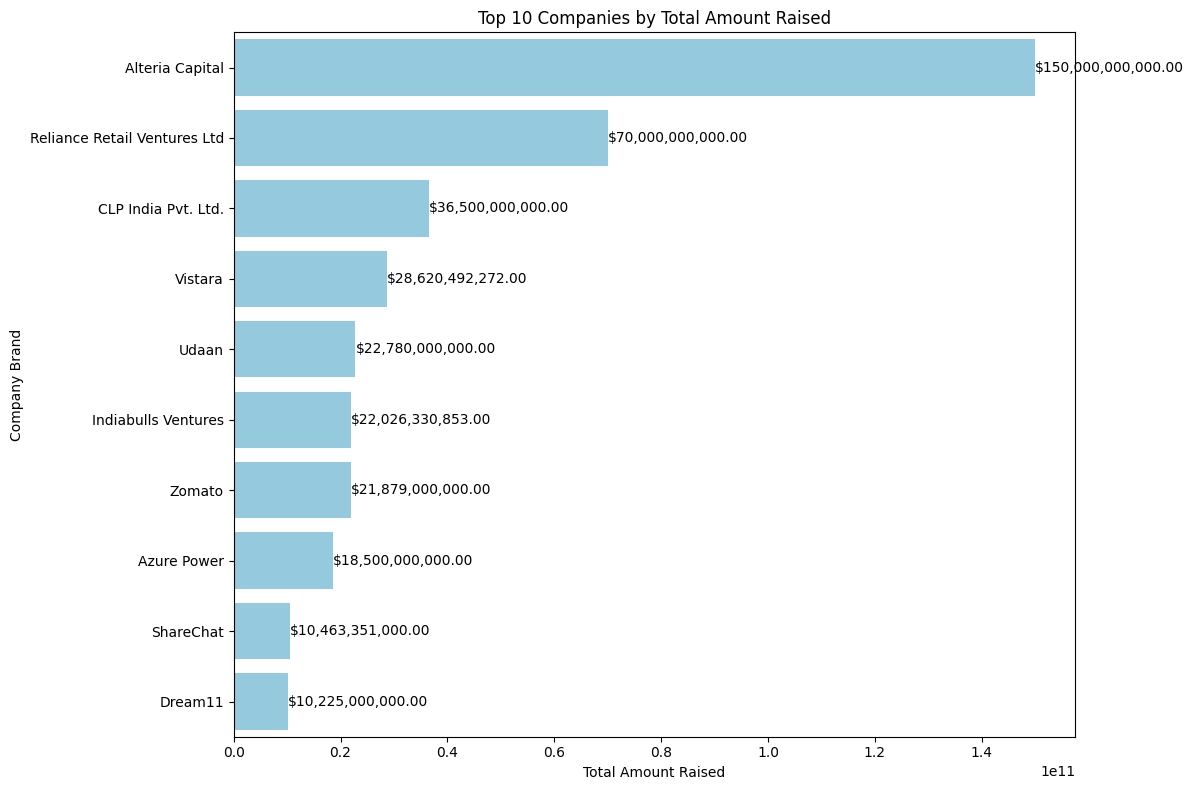

In [447]:
total_amount_raised = df.groupby('Company_Brand')['Amount'].sum()
total_amount_raised = total_amount_raised.reset_index()

# Sort the data by total funding in descending order
total_amount_raised = total_amount_raised.sort_values(by='Amount', ascending=False)

# Select the top 10 companies to display
top_n = 10  
total_amount_raised_top_n = total_amount_raised.head(top_n)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Amount', y='Company_Brand', data=total_amount_raised_top_n, color='skyblue')

# Annotate each bar with its corresponding amount value
for index, value in enumerate(total_amount_raised_top_n['Amount']):
    barplot.text(value, index, f'${value:,.2f}', va='center', fontsize=10, color='black')
plt.xlabel('Total Amount Raised')
plt.ylabel('Company Brand')
plt.title(f'Top {top_n} Companies by Total Amount Raised')
plt.tight_layout()
plt.show()

3. How many start-ups are there in the various Headquarter2?

<function matplotlib.pyplot.show(close=None, block=None)>

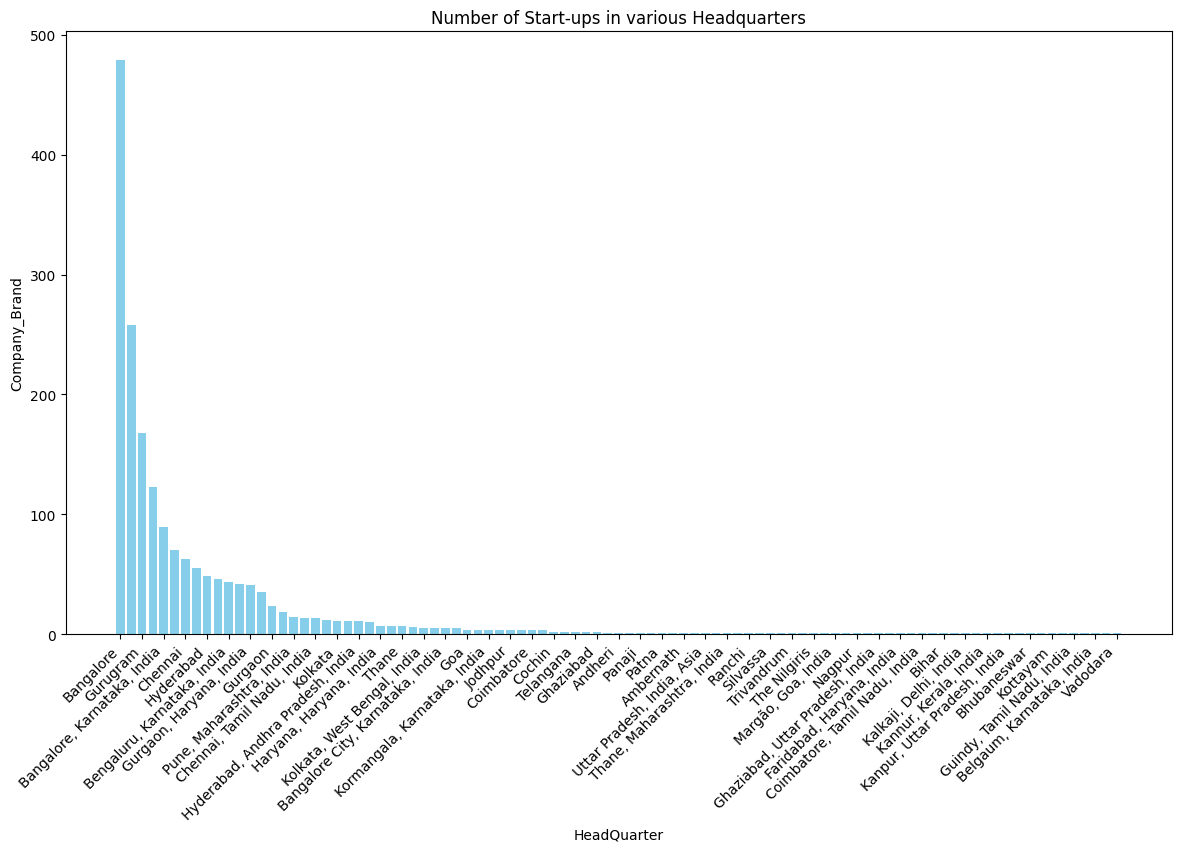

In [448]:
start_up_counts = df.groupby('HeadQuarter')['Company_Brand'].nunique().reset_index()

# sort the start_up_counts
start_up_counts = start_up_counts.sort_values(by='Company_Brand', ascending=False)

headquarter_to_show = start_up_counts['HeadQuarter'].iloc[::2]

# Visualize using a bar chart
plt.figure(figsize=(12,8))
plt.bar(start_up_counts['HeadQuarter'], start_up_counts['Company_Brand'],color='skyblue', width=0.8)
plt.xlabel('HeadQuarter')
plt.ylabel('Company_Brand')
plt.title('Number of Start-ups in various Headquarters')
plt.xticks(headquarter_to_show,rotation=45, ha='right')
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.show



4.  In which year did Startups raise the highest funds?


In [449]:
total_funding_by_year = df.groupby('Funding_year')['Amount'].sum()
print(total_funding_by_year)
#Find the 'Funding_year' with the maximum total funding
year_with_max_funding = total_funding_by_year.idxmax()


Funding_year
2018    3.383843e+11
2019    3.336433e+09
2020    8.453271e+10
2021    1.793865e+11
Name: Amount, dtype: float64


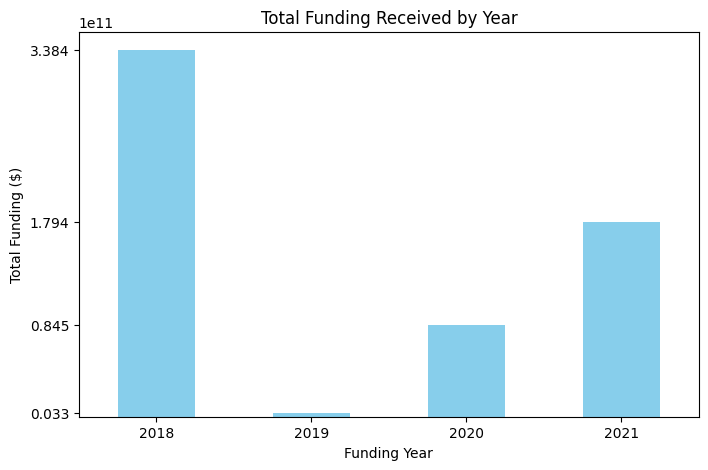

In [450]:
# Plotting the bar chart
plt.figure(figsize=(8, 5))
total_funding_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Funding Received by Year')
plt.xlabel('Funding Year')
plt.ylabel('Total Funding ($)')
plt.xticks(rotation=0)
plt.yticks(total_funding_by_year)
plt.show()

5. Which sector group received the highest funding?

In [451]:
sector_category_with_highest_funding = df.groupby('Sector_category')['Amount'].sum()
print(sector_category_with_highest_funding)
max_sector_category = sector_category_with_highest_funding.idxmax()

Sector_category
Communication Services    2.368958e+08
Consumer Discretionary    1.477690e+11
Consumer Staple           3.600000e+06
Energy                    5.800243e+10
Financials                2.189014e+11
Health Care               2.590392e+10
Industrial                9.643684e+09
Information Technology    6.555468e+10
Material                  2.570000e+06
Real Estate               6.439611e+07
Utilities                 5.193074e+07
unknown                   7.950544e+10
Name: Amount, dtype: float64


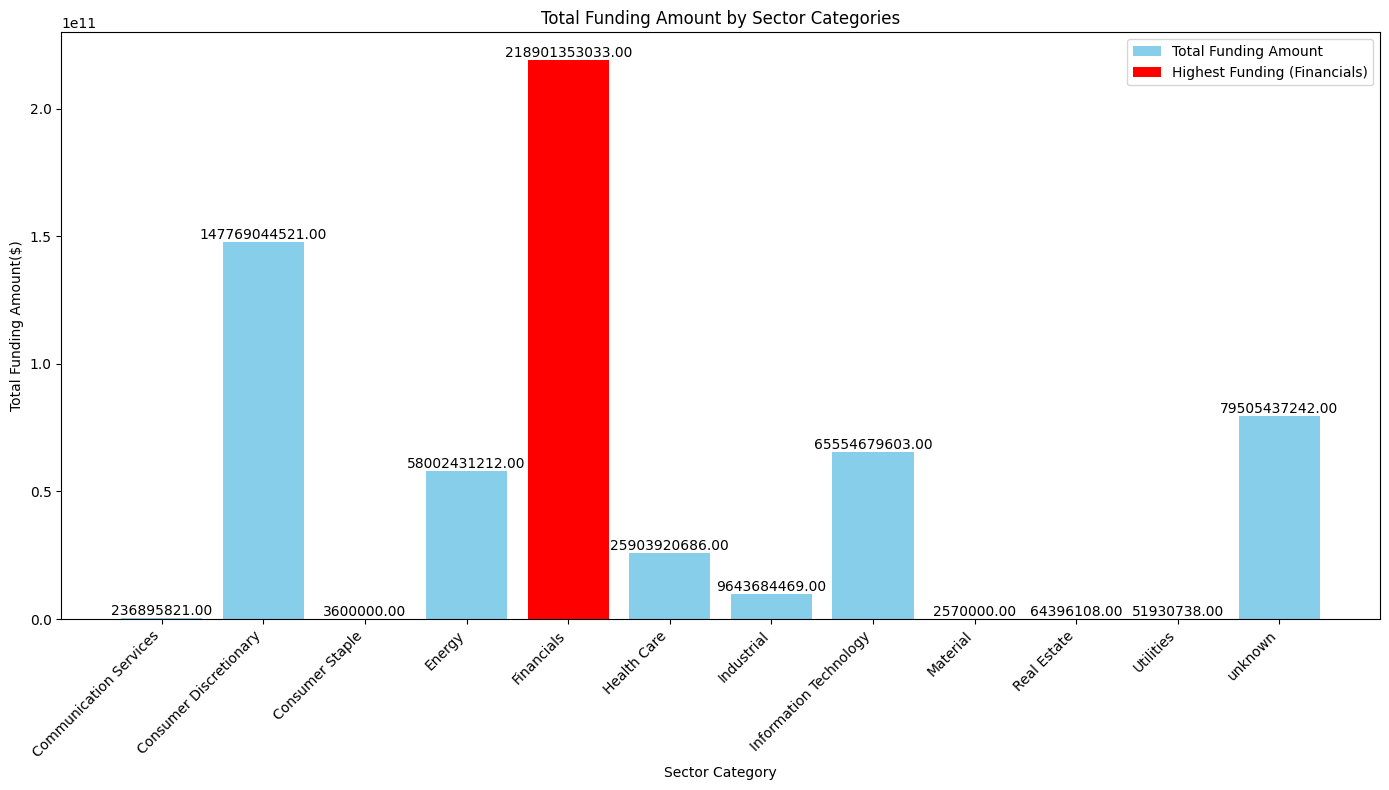

In [452]:


# Plot the bar chart
plt.figure(figsize=(14, 8))

# Plot the bars
bar_chart = plt.bar(sector_category_with_highest_funding.index, sector_category_with_highest_funding.values, color='skyblue', label='Total Funding Amount')

# Highlight the sector category with the highest funding
plt.bar(max_sector_category, sector_category_with_highest_funding[max_sector_category], color='red', label=f'Highest Funding ({max_sector_category})')

plt.xlabel('Sector Category')
plt.ylabel('Total Funding Amount($)')
plt.title('Total Funding Amount by Sector Categories')
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar
for i, rect in enumerate(bar_chart):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()
